<a href="https://colab.research.google.com/github/Tdas-christ/CV/blob/main/2348569_Non_Linear_Spatial_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading the image and necessary packages**

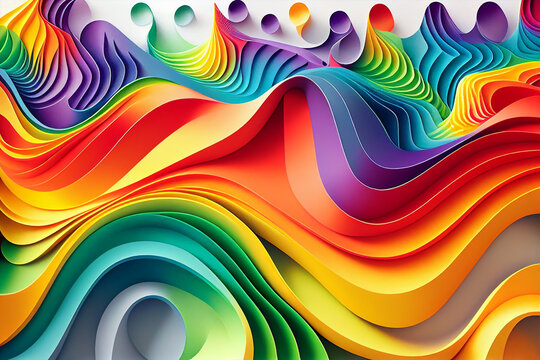

In [14]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read the input image
img = cv2.imread('/content/drive/MyDrive/IMAGES (CV)/colorful_image.jpg')
cv2_imshow(img)

# **Median Filtering**

Median Filtered Image (Using OpenCV)


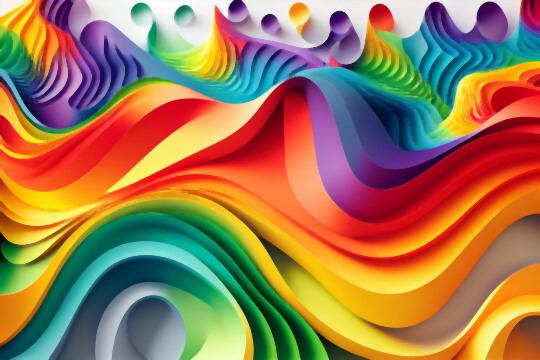

In [15]:
# Apply median filtering using OpenCV built-in function
median_filtered_img_opencv = cv2.medianBlur(img, 5)  # Kernel size of 5

print('Median Filtered Image (Using OpenCV)')
cv2_imshow(median_filtered_img_opencv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
# Define the user-defined median filter function
def user_defined_median_filter(image, kernel_size):
    result_image = np.zeros_like(image)
    padding_size = kernel_size // 2
    padded_image = np.pad(image, padding_size, 'constant')

    for i in range(padding_size, padded_image.shape[0] - padding_size):
        for j in range(padding_size, padded_image.shape[1] - padding_size):
            # Extract the neighborhood for the median filter
            neighbors = padded_image[i - padding_size:i + padding_size + 1, j - padding_size:j + padding_size + 1]
            # Apply the median filter and assign the result to the corresponding pixel
            result_image[i - padding_size, j - padding_size] = np.median(neighbors)

    return result_image

In [22]:
# Applying the user-defined median filter function
median_filtered_img1 = user_defined_median_filter(img, 5)

Median Filtered Image (User-Defined Function)


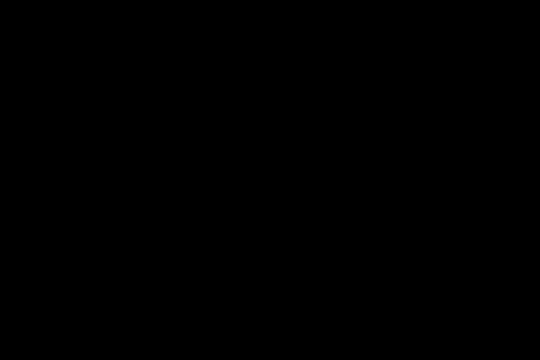

In [23]:
# Display the filtered image using the user-defined function
print('Median Filtered Image (User-Defined Function)')
cv2_imshow(median_filtered_img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

# **Bilateral Filtering**

Bilateral Filtered Image (Using OpenCV)


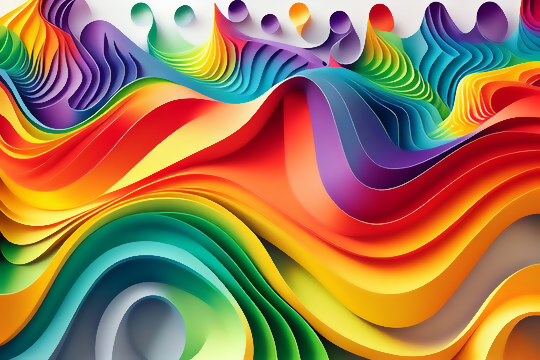

In [19]:
# Apply bilateral filtering using OpenCV built-in function
bilateral_filtered_img = cv2.bilateralFilter(img, 9, 75, 75)

# Display the filtered image using OpenCV
print('Bilateral Filtered Image (Using OpenCV)')
cv2_imshow(bilateral_filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Bilateral filtering does not typically have a straightforward user-defined implementation due to its complexity and the specialized nature of the algorithm.

# **Anisotropic Diffusion**

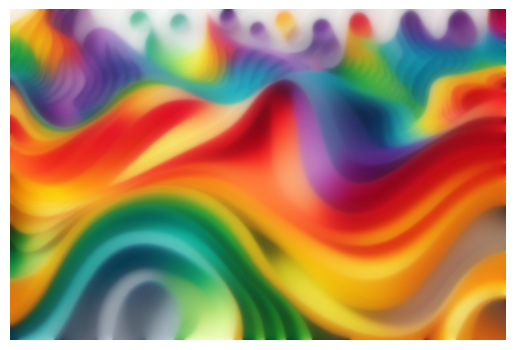

In [20]:
from skimage.restoration import denoise_tv_bregman
import matplotlib.pyplot as plt
from PIL import Image

# Read the input image
img = np.array(Image.open('/content/drive/MyDrive/IMAGES (CV)/colorful_image.jpg'))

# Apply anisotropic diffusion using scikit-image library
denoised_img = denoise_tv_bregman(img, 0.1)

# Display the denoised image
plt.imshow(denoised_img, cmap='gray')
plt.axis('off')
plt.show()

Anisotropic diffusion does not have a typical user-defined implementation due to its complex nature and specialized algorithms.